<a href="https://colab.research.google.com/github/MRameezU/MLOPs_Classification_Problem/blob/main/notebook/01_Exploratory_Data_Analysis_US_Visa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
pd.__version__

'2.1.4'

In [8]:
df=pd.read_csv("EasyVisa.csv")
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [9]:
df.shape

(25480, 12)

In [10]:
# Statistical summary
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


## EXPLORING DATA

In [12]:
# Define numerical and categorical columns
numeric_features = df.select_dtypes(exclude='O').columns.tolist()
categorical_features = df.select_dtypes(include='O').columns.tolist()

# Print numerical and categorical columns
print(f"We have {len(numeric_features)} numerical features: {numeric_features}")
print(f"\nWe have {len(categorical_features)} categorical features: {categorical_features}")


We have 3 numerical features: ['no_of_employees', 'yr_of_estab', 'prevailing_wage']

We have 9 categorical features: ['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


* Use `select_dtypes()`: This is more efficient than manually checking data types with `.dtype`.
* List Conversion: `.columns.tolist()` is used to directly convert to a list.


In [13]:
# Proportion of count data for categorical columns
for col in categorical_features:
    print(f"Column: {col}")
    print(df[col].value_counts(normalize=True).mul(100).round(2).astype(str) + '%')
    # mul(100).round(2): Converts the proportions to percentages,
    # rounded to two decimal places for better readability.
    print('-' * 30)


Column: case_id
case_id
EZYV01       0.0%
EZYV16995    0.0%
EZYV16993    0.0%
EZYV16992    0.0%
EZYV16991    0.0%
             ... 
EZYV8492     0.0%
EZYV8491     0.0%
EZYV8490     0.0%
EZYV8489     0.0%
EZYV25480    0.0%
Name: proportion, Length: 25480, dtype: object
------------------------------
Column: continent
continent
Asia             66.17%
Europe           14.65%
North America    12.92%
South America     3.34%
Africa            2.16%
Oceania           0.75%
Name: proportion, dtype: object
------------------------------
Column: education_of_employee
education_of_employee
Bachelor's     40.16%
Master's       37.81%
High School    13.42%
Doctorate        8.6%
Name: proportion, dtype: object
------------------------------
Column: has_job_experience
has_job_experience
Y    58.09%
N    41.91%
Name: proportion, dtype: object
------------------------------
Column: requires_job_training
requires_job_training
N    88.4%
Y    11.6%
Name: proportion, dtype: object
-----------------------

## Univariate Analysis

**Univariate analysis** refers to the analysis of a single variable. The prefix "uni" means "one," indicating that we are examining the distribution and characteristics of one variable at a time. The purpose of univariate analysis is to summarize and understand the underlying patterns, trends, or outliers within that variable.

### Other Types of Analysis:

- **Bivariate Analysis**: This involves the analysis of two variables to explore relationships or correlations between them.
  
- **Multivariate Analysis**: This extends to the analysis of two or more variables, often used to understand complex relationships and interactions among multiple variables.



### Numerical Features

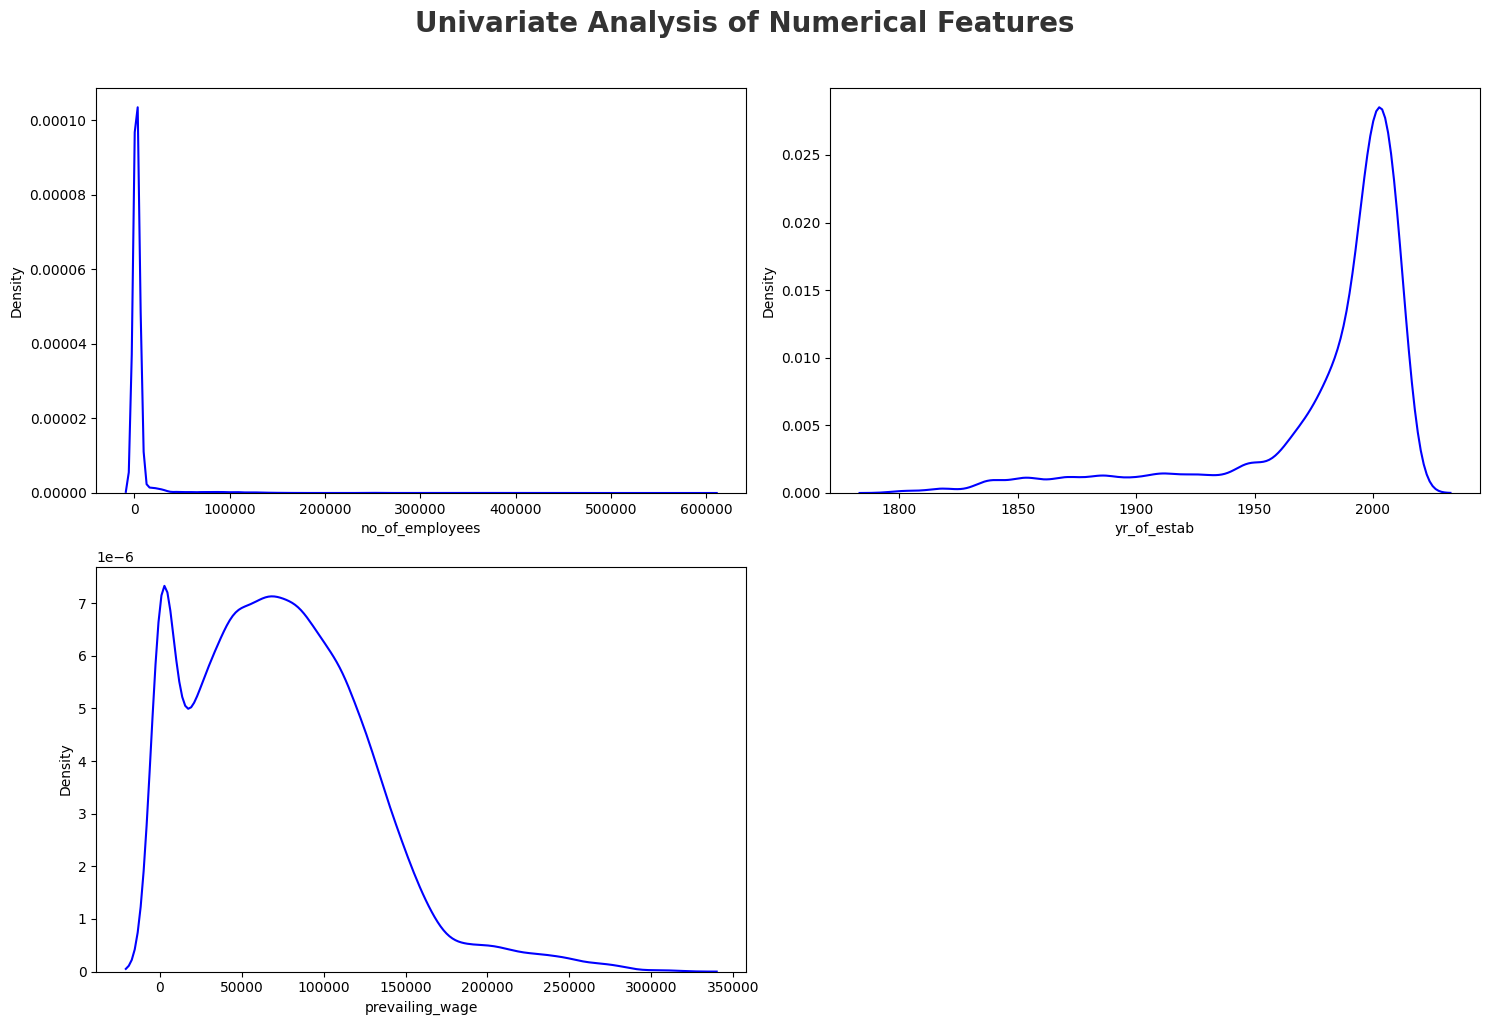

In [14]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size and overall title for the plots
plt.figure(figsize=(15, 10))  # Create a figure window with a custom size
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.02)  # Set the title with styling

# Loop through each numerical feature to plot its distribution
for i in range(0, len(numeric_features)):
    plt.subplot(2, 2, i + 1)  # Create a 2x2 grid of subplots, placing each plot in the next available space
    sns.kdeplot(x=df[numeric_features[i]], color='blue')  # Plot the Kernel Density Estimate (KDE) of the current feature
    plt.xlabel(numeric_features[i])  # Set the x-axis label to the feature name

    plt.tight_layout()  # Adjust subplot spacing to ensure there's no overlap

# Show the plot
plt.show()


## Categorical Features

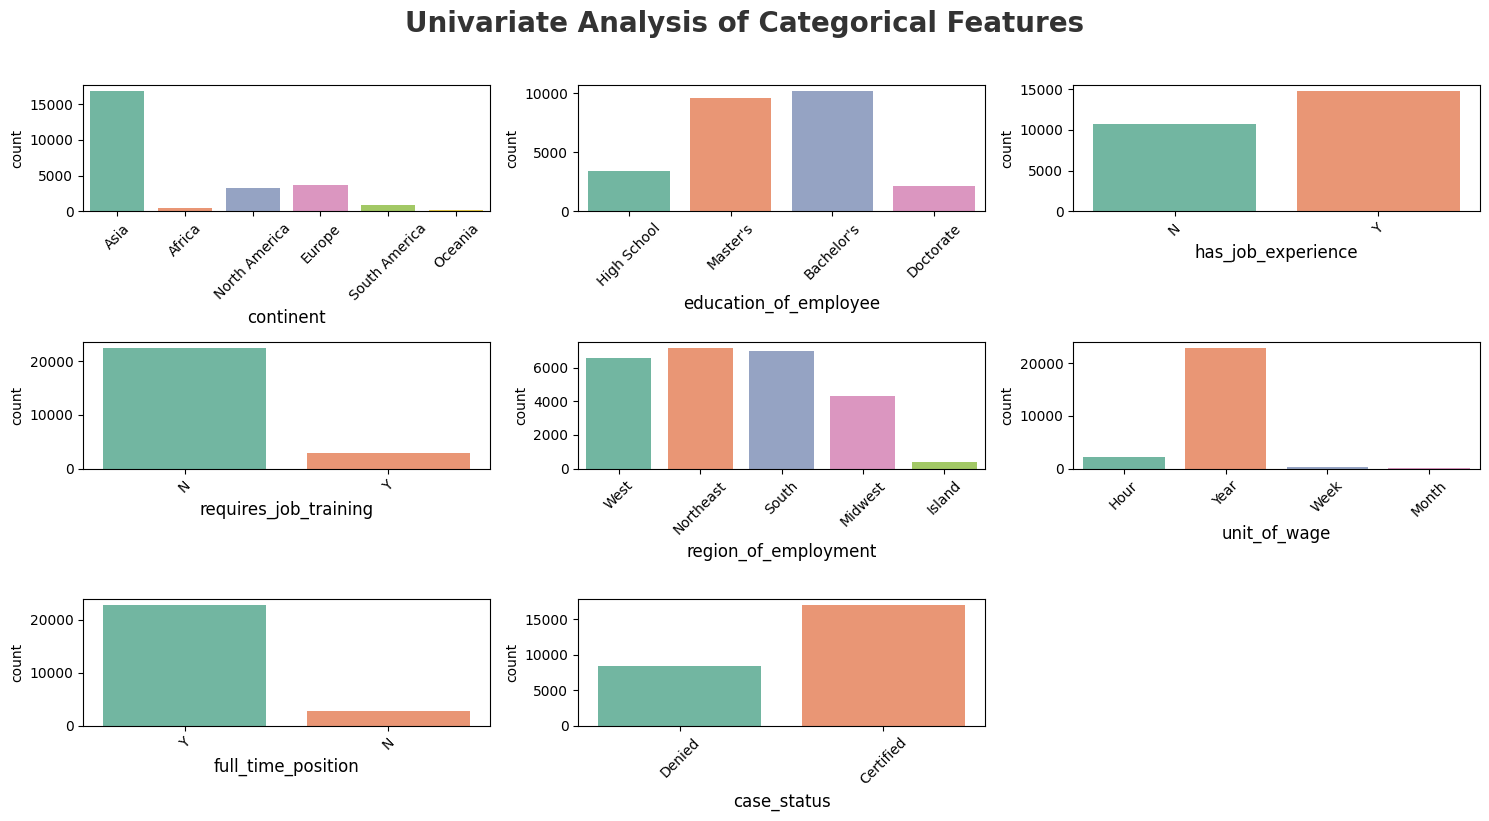

In [15]:
# Remove 'case_id' from the list of categorical features as it is not relevant for analysis
categorical_features.remove('case_id')

# Set up the figure size and the overall title for the categorical feature analysis
plt.figure(figsize=(15, 8))  # Create a figure window with a custom size
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.02)  # Set the title with styling

# Loop through each categorical feature to plot its count distribution
for i in range(len(categorical_features)):
    plt.subplot(3, 3, i + 1)  # Create a 3x3 grid for subplots, positioning each plot in a specific grid cell
    sns.countplot(x=df[categorical_features[i]], hue=df[categorical_features[i]], palette='Set2', legend=False)  # Plot the count of each category with hue
    plt.xlabel(categorical_features[i], fontsize=12)  # Set the x-axis label with appropriate feature name and font size
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if the category names are long

    plt.tight_layout()  # Ensure proper spacing between subplots to avoid overlap

# Display the plots
plt.show()


insight: signle category dominating throughout.

removing `case_id` as it doesnt contain any meaningfull info and it is also not in out *database*

## Multivariate Analysis

In [16]:
# Identify discrete features (numeric features with 25 or fewer unique values)
discrete_features = [feature for feature in numeric_features if len(df[feature].unique()) <= 25]

# Identify continuous features (numeric features with more than 25 unique values)
continuous_features = [feature for feature in numeric_features if len(df[feature].unique()) > 25]

# Print the count and names of discrete features
print(f'We have {len(discrete_features)} discrete features: {discrete_features}')

# Print the count and names of continuous features
print(f'We have {len(continuous_features)} continuous features: {continuous_features}')


We have 0 discrete features: []
We have 3 continuous features: ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


## Check Multicollinearity in Numerical features

In [17]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


there is no multicollinearity

## Check Multicollinearity for Categorical features

### Chi-Square Test: Overview

The **Chi-Square Test** (χ² test) is a statistical test used to determine whether there is a significant association between two categorical variables. It is used in scenarios where both the predictor and target variables are categorical, and the goal is to assess whether the distribution of one variable depends on the other.

#### How Chi-Square Test Works
1. **Null Hypothesis (H₀)**: There is no association between the two variables (they are independent).
2. **Alternative Hypothesis (H₁)**: There is an association between the two variables (they are not independent).

The test compares the **observed frequency** of occurrences in each category of a contingency table with the **expected frequency** (the frequency we would expect if there was no relationship between the variables). The Chi-Square test statistic is calculated as:

$$
\chi^2 = \sum \frac{(O - E)^2}{E}
$$



Where:
- **O** is the observed frequency.
- **E** is the expected frequency.

A high value of the Chi-Square statistic indicates a large difference between observed and expected frequencies, suggesting a relationship between the variables. The test returns a **p-value**, which helps us decide whether to reject or fail to reject the null hypothesis.

#### Interpreting the p-value
- **p-value < 0.05**: Reject the null hypothesis (there is a significant association between the variables).
- **p-value >= 0.05**: Fail to reject the null hypothesis (no significant association).

---

### Testing Correlation of Categorical Columns with the Target (`case_status`)

Since your target variable `case_status` is categorical, you can use the **Chi-Square test** to check whether the categorical features (like `continent`, `education_of_employee`, etc.) are significantly associated with `case_status`. Here's how you can go about testing this:

1. **Construct Contingency Tables**: These tables will show the frequencies of each combination of values between the categorical feature and the target variable.
   
2. **Run the Chi-Square Test**: Apply the test to each categorical feature using its contingency table to determine whether the feature and `case_status` are independent.

---

### Example Code for Testing Correlation of Categorical Columns with `case_status`



In [18]:
from scipy.stats import chi2_contingency
import pandas as pd

# List to store test results
chi2_test_results = []

# Iterate over all categorical features
for feature in categorical_features:
    # Create a contingency table
    contingency_table = pd.crosstab(df['case_status'], df[feature])

    # Apply the Chi-Square test
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

    # Interpret the p-value
    if p_value < 0.05:
        chi2_test_results.append((feature, 'Significant (Reject H₀)', p_value))
    else:
        chi2_test_results.append((feature, 'Not Significant (Fail to Reject H₀)', p_value))

# Convert results to a DataFrame for easier interpretation
chi2_test_df = pd.DataFrame(chi2_test_results, columns=['Feature', 'Hypothesis Result', 'p-value'])

# Display the results
chi2_test_df

,Feature,Hypothesis Result,p-value
0,continent,Significant (Reject H₀),8.828798e-74
1,education_of_employee,Significant (Reject H₀),0.000000e+00
2,has_job_experience,Significant (Reject H₀),1.922560e-206
3,requires_job_training,Not Significant (Fail to Reject H₀),1.855647e-01
4,region_of_employment,Significant (Reject H₀),2.338664e-63
5,unit_of_wage,Significant (Reject H₀),5.193385e-240
6,full_time_position,Significant (Reject H₀),4.469975e-02
7,case_status,Significant (Reject H₀),0.000000e+00


### Explanation:
- **Contingency Table**: The `pd.crosstab()` function creates a contingency table between `case_status` and the categorical feature.
- **Chi-Square Test**: `chi2_contingency()` performs the test, returning the test statistic, p-value, degrees of freedom, and expected frequencies.
- **Result Interpretation**: Based on the p-value, if it's below 0.05, we reject the null hypothesis, indicating a significant association between the feature and the `case_status`.

### Conclusion:
The Chi-Square test is an effective method for checking the correlation between categorical features and a categorical target variable (like `case_status`). By applying it, you can identify which features are statistically significant in relation to the target, helping in feature selection or engineering during your analysis process.

**INSIGHT:** The test result for `requires_job_training` shows that there is no significant relationship with case status. This suggests that whether a job requires training does not seem to influence the outcomes of the cases. It could imply that both trained and untrained employees face similar challenges in the employment process.

## Checking Null Values

In [19]:
df.isnull().sum()

,0
case_id,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0


## Continious features

Continuous features can take any value within a given range, including decimal (fractional) values. These are typically measured and can take an infinite number of values.

**Examples:**

* Height (e.g., 5.72 feet)
* Weight (e.g., 72.5 kg)
* Temperature (e.g., 98.6°F)

**Characteristics:**

* Values are often represented with floating-point numbers.
* Continuous features have a range (min to max) but can theoretically take any value within that range.
* In theory, there are no gaps between values.

In [23]:
contin_features=[feature for feature in numeric_features if feature not in discrete_features]
print(f"Continious Feature Columns: {contin_features}")
print(f"Number of Continious Feature Columns: {len(contin_features)}")

Continious Feature Columns: ['no_of_employees', 'yr_of_estab', 'prevailing_wage']
Number of Continious Feature Columns: 3


<ipython-input-25-707a8bc34b9b>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='case_status', y=col, palette=clr1, ax=ax[i, 0])
<ipython-input-25-707a8bc34b9b>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='case_status', y=col, palette=clr1, ax=ax[i, 0])
<ipython-input-25-707a8bc34b9b>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='case_status', y=col, palette=clr1, ax=ax[i, 0])


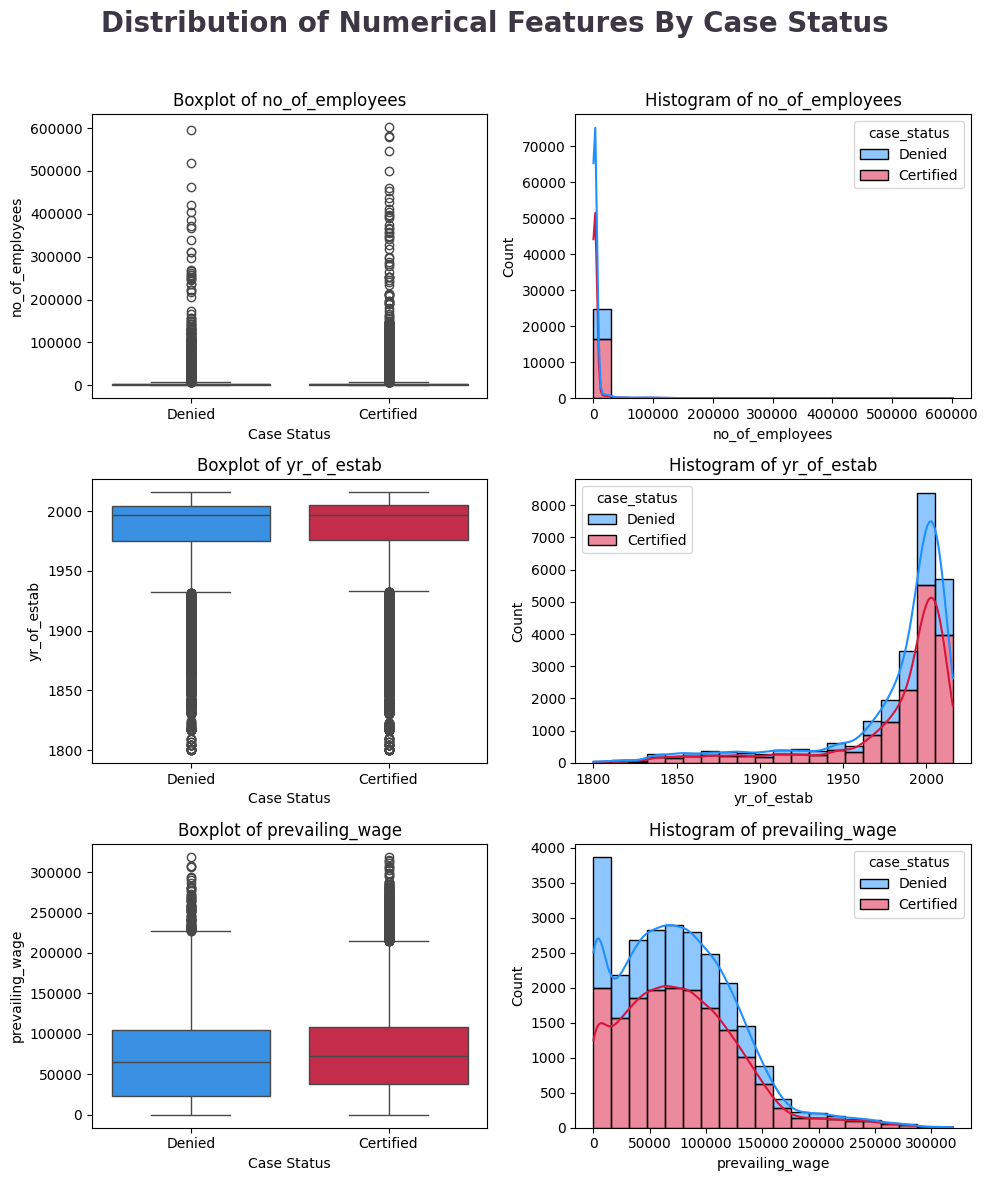

In [25]:
# Define colors for the plots
clr1 = ['#1E90FF', '#DC143C']

# Set up a grid of subplots: 3 rows and 2 columns
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 12))

# Main title for the figure
fig.suptitle('Distribution of Numerical Features By Case Status',
             color='#3C3744', fontsize=20, fontweight='bold', ha='center')

# Loop over continuous features and create the boxplots and histograms
for i, col in enumerate(continuous_features):
    # Boxplot to compare distributions of 'case_status' for each continuous feature
    sns.boxplot(data=df, x='case_status', y=col, palette=clr1, ax=ax[i, 0])
    ax[i, 0].set_title(f'Boxplot of {col}', fontsize=12)
    ax[i, 0].set_xlabel('Case Status')  # Label x-axis
    ax[i, 0].set_ylabel(col)  # Label y-axis

    # Histogram with stacked bars, displaying distribution by 'case_status'
    sns.histplot(data=df, x=col, hue='case_status', bins=20, kde=True,
                 multiple='stack', palette=clr1, ax=ax[i, 1])
    ax[i, 1].set_title(f'Histogram of {col}', fontsize=12)
    ax[i, 1].set_xlabel(col)  # Label x-axis
    ax[i, 1].set_ylabel('Count')  # Label y-axis

# Adjust layout to avoid overlap and improve spacing
fig.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust to leave space for the title

# Optional: Save the figure (commented out for now)
# plt.savefig('images/multivariate_num.png')

# Show the plot
plt.show()


**NOTE:**
  
* **Continuous features** are usually treated with *scaling* techniques (e.g., Min-Max scaling, Standardization).
* **Discrete features** might be treated as either *categorical* or *ordinal* depending on their context or binned into categories.

### Initial Analysis Report

1. **No of Employees:**
   - The `no_of_employees` feature contains numerous outliers, which should be addressed during feature engineering.
   - The distribution is **right-skewed**, indicating that most companies have a smaller workforce, with fewer having a significantly larger number of employees.

2. **Year of Establishment (yr_of_estab):**
   - This feature is **left-skewed**, meaning more companies were established in recent years.
   - A few outliers exist below the lower bound of the box plot, suggesting unusually early establishment years that may require further investigation.

3. **Prevailing Wage:**
   - The `prevailing_wage` feature is also **right-skewed**, with a long tail of higher wages.
   - There are notable outliers above the upper bound of the box plot, which may need treatment to avoid influencing model performance.

4. **Missing Data:**
   - There are **no missing values** in the dataset, which simplifies preprocessing.

5. **Case ID:**
   - The `case_id` column consists of unique values for each row, and since it doesn't provide useful information for prediction, it can be safely **dropped**.

6. **Case Status:**
   - The `case_status` column is the **target variable** for prediction, where the objective is to classify each case as either approved or denied.

7. **Categorical Features:**
   - Many categorical features can be converted into **binary numerical** representations during feature encoding to make them suitable for machine learning algorithms.

## Visualize, Visualize, Visualize
### Visualize the Target Feature

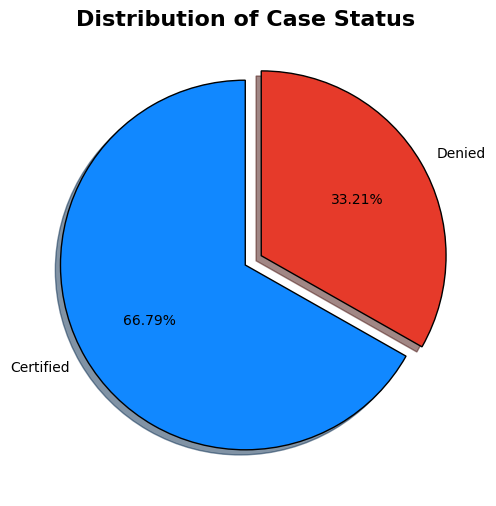

In [27]:
# Calculate the percentage distribution of 'case_status'
percentage = df['case_status'].value_counts(normalize=True) * 100
labels = ["Certified", "Denied"]  # Define labels for the pie chart

# Set up the figure and axis for the pie chart
fig, ax = plt.subplots(figsize=(6, 6))

# Define the explode and color scheme for the slices
explode = (0, 0.1)  # Slightly "explode" the second slice (Denied)
colors = ['#1188ff', '#e63a2a']  # Custom colors for each slice

# Plot the pie chart
ax.pie(percentage, labels=labels, startangle=90, autopct='%1.2f%%',
       explode=explode, shadow=True, colors=colors, wedgeprops={'edgecolor': 'black'})

# Add a title to the chart
plt.title('Distribution of Case Status', fontsize=16, fontweight='bold')

# Display the plot
plt.show()


from the above chart we can see that there is an imbalance in data between the approved and denied values

## Impact of Continent on Visa Status

In [ ]:
df.groupby("continent")["case_status"].value_counts(normalize=True).to_frame()*100

## Feature Engineering
### Feature Extraction

In [ ]:
df.head()

as `yr_of_estab` does not hold any meaningful info on its own but can be converted to `company_age` which is a meaningful feature

In [ ]:
from datetime import date
present_year=date.today().year
present_year

In [ ]:
df['company_age']=present_year-df['yr_of_estab']
# removing 'yr_of_estab'
df.drop('yr_of_estab',inplace=True,axis=1)
df.head()

## Analysing features

### Numerical Features

**Note:** `O`stands for `object` data type, which is typically used for strings or categorical data in pandas. It essentially means `non-numerical` data.

In [ ]:
num_features=[feature for feature in df.columns if df[feature].dtype !='O']
print(f"Numerical feture Columns : {num_features}")
print(f"Number of Numnerical features:  {len(num_features)}")

### Categorical Features

In [ ]:
cat_features=[feature for feature in df.columns if df[feature].dtype == 'O']
print(f"Categorical Feature Columns: {cat_features}")
print(f"Number of Categorical Feature Columns: {len(cat_features)}")

### Discrete Features
Discrete features can only take specific, distinct values. These are typically counted and cannot take fractional values.

**Examples:**

* Number of children (e.g., 0, 1, 2, 3)
* Number of cars (e.g., 1, 2, 3)
* Shoe size (e.g., 7, 8, 9)
  
**Characteristics:**

* Values are typically represented with integers (whole numbers).
* Discrete features have gaps between values (e.g., you can’t have 1.5 children).
* The range of values can be finite or infinite, but the values are distinct.


In [ ]:
disc_features=[feature for feature in num_features if len(df[feature].unique())<=25]
disc_features

## Continious features

Continuous features can take any value within a given range, including decimal (fractional) values. These are typically measured and can take an infinite number of values.

**Examples:**

* Height (e.g., 5.72 feet)
* Weight (e.g., 72.5 kg)
* Temperature (e.g., 98.6°F)

**Characteristics:**

* Values are often represented with floating-point numbers.
* Continuous features have a range (min to max) but can theoretically take any value within that range.
* In theory, there are no gaps between values.

## Split DataFrame into Inputs and Outputs
* X = Inputs
* Y = Outputs
  

In [ ]:
df.columns

In [ ]:
X=df.drop('case_status',axis=1)
Y=df['case_status']

In [ ]:
# Viewing inputs
X.head()

In [ ]:
# Outputs
Y.head()